In [ ]:
#(Decision Tree, Random Forest, Bagging, AdaBoost, SVM, and MLP)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['JM1.csv']))

Saving JM1.csv to JM1.csv


In [ ]:
import pandas as pd

# Assuming `data` is a NumPy array
df = pd.DataFrame(data)  # Convert to a DataFrame

X = df.iloc[:, :-1]  # Perform indexing on the DataFrame
y = df.iloc[:, -1]


In [ ]:
from sklearn.impute import SimpleImputer

# impute missing values with mean of respective feature columns
imp_mean = SimpleImputer(strategy='mean')
X = imp_mean.fit_transform(data)

# select k best features
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)
X = selector.transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


In [ ]:
data

,id,LOC_BLA0K,BRA0CH_COU0T,LOC_CODE_A0D_COMME0T,LOC_COMME0TS,C1CLOMATIC_COMPLEXIT1,DESIG0_COMPLEXIT1,ESSE0TIAL_COMPLEXIT1,LOC_EXECUTABLE,HALSTEAD_CO0TE0T,...,HALSTEAD_LE0GTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,0UM_OPERA0DS,0UM_OPERATORS,0UM_U0IQUE_OPERA0DS,0UM_U0IQUE_OPERATORS,LOC_TOTAL,label
0,1,1,7,0,0,4,3,1,11,25.05,...,59,0.09,174.56,280.54,28,31,15,12,14,0
1,2,5,37,0,6,19,16,10,85,81.19,...,351,0.04,3388.22,2225.29,147,204,59,22,98,0
2,3,2,1,0,0,1,1,1,10,56.44,...,37,0.35,25.17,159.91,17,20,15,5,14,1
3,4,16,1,0,0,1,1,1,52,168.57,...,450,0.06,2697.42,2860.90,198,252,70,12,70,1
4,5,0,7,0,0,4,2,3,9,14.32,...,26,0.13,47.33,110.45,9,17,7,12,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,7778,4,3,0,3,2,2,1,13,19.18,...,64,0.06,262.08,300.83,23,41,11,15,22,0
7778,7779,2,9,0,0,5,2,3,11,17.01,...,44,0.09,129.37,199.04,18,26,10,13,15,0
7779,7780,18,105,0,18,53,22,53,84,51.30,...,489,0.02,9180.73,2911.60,168,321,37,25,123,1
7780,7781,1,5,0,0,3,3,1,15,29.25,...,41,0.16,63.48,182.84,15,26,12,10,18,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
bagging_clf = BaggingClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

classifiers = [('Decision Tree', dt_clf),

               ('Random Forest', rf_clf),

               ('Bagging', bagging_clf),

               ('AdaBoost', adaboost_clf),

               ('SVM', svm_clf),

               ('MLP', mlp_clf)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)


In [ ]:
for clf_name, clf in classifiers:
    #y_pred = clf.predict(X_test)
    acc = clf.score(X_train, y_train)
    #precision = precision_score(X_train, y_train)
    #recall = recall_score(X_train, y_train)
    #f1 = f1_score(X_train, y_train)
    print(f"{clf_name}: Accuracy: {acc}")


Decision Tree: Accuracy: 1.0
Random Forest: Accuracy: 1.0
Bagging: Accuracy: 1.0
AdaBoost: Accuracy: 1.0
SVM: Accuracy: 0.7893975903614457
MLP: Accuracy: 0.9893975903614458


In [ ]:
for clf_name, clf in classifiers:
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{clf_name}: Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Decision Tree: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Random Forest: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Bagging: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
AdaBoost: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
SVM: Accuracy: 0.7951188182402055, Precision: 0.7368421052631579, Recall: 0.042682926829268296, F1 Score: 0.08069164265129683
MLP: Accuracy: 0.9922928709055877, Precision: 0.9702380952380952, Recall: 0.9939024390243902, F1 Score: 0.9819277108433735


In [ ]:
voting_clf = VotingClassifier(classifiers, voting='soft')
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Ensemble Learners Voting: Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Ensemble Learners Voting: Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0


In [ ]:
accuracy_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf_name, clf in classifiers]
precision_scores = [precision_score(y_test, clf.predict(X_test)) for clf_name, clf in classifiers]


True:  1672 False:  6110


<Axes: >

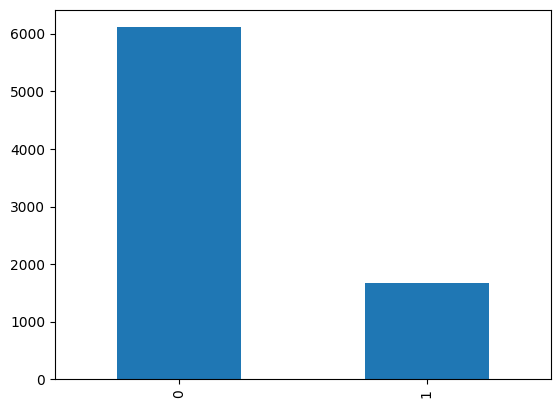

In [ ]:
# label classification
defects_true_false = data.groupby('label')['HALSTEAD_VOLUME'].apply(lambda x: x.count())
print('True: ', defects_true_false[1], 'False: ', defects_true_false[0])
data.label.value_counts().plot.bar()

<ipython-input-16-ea4ce21f6608>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


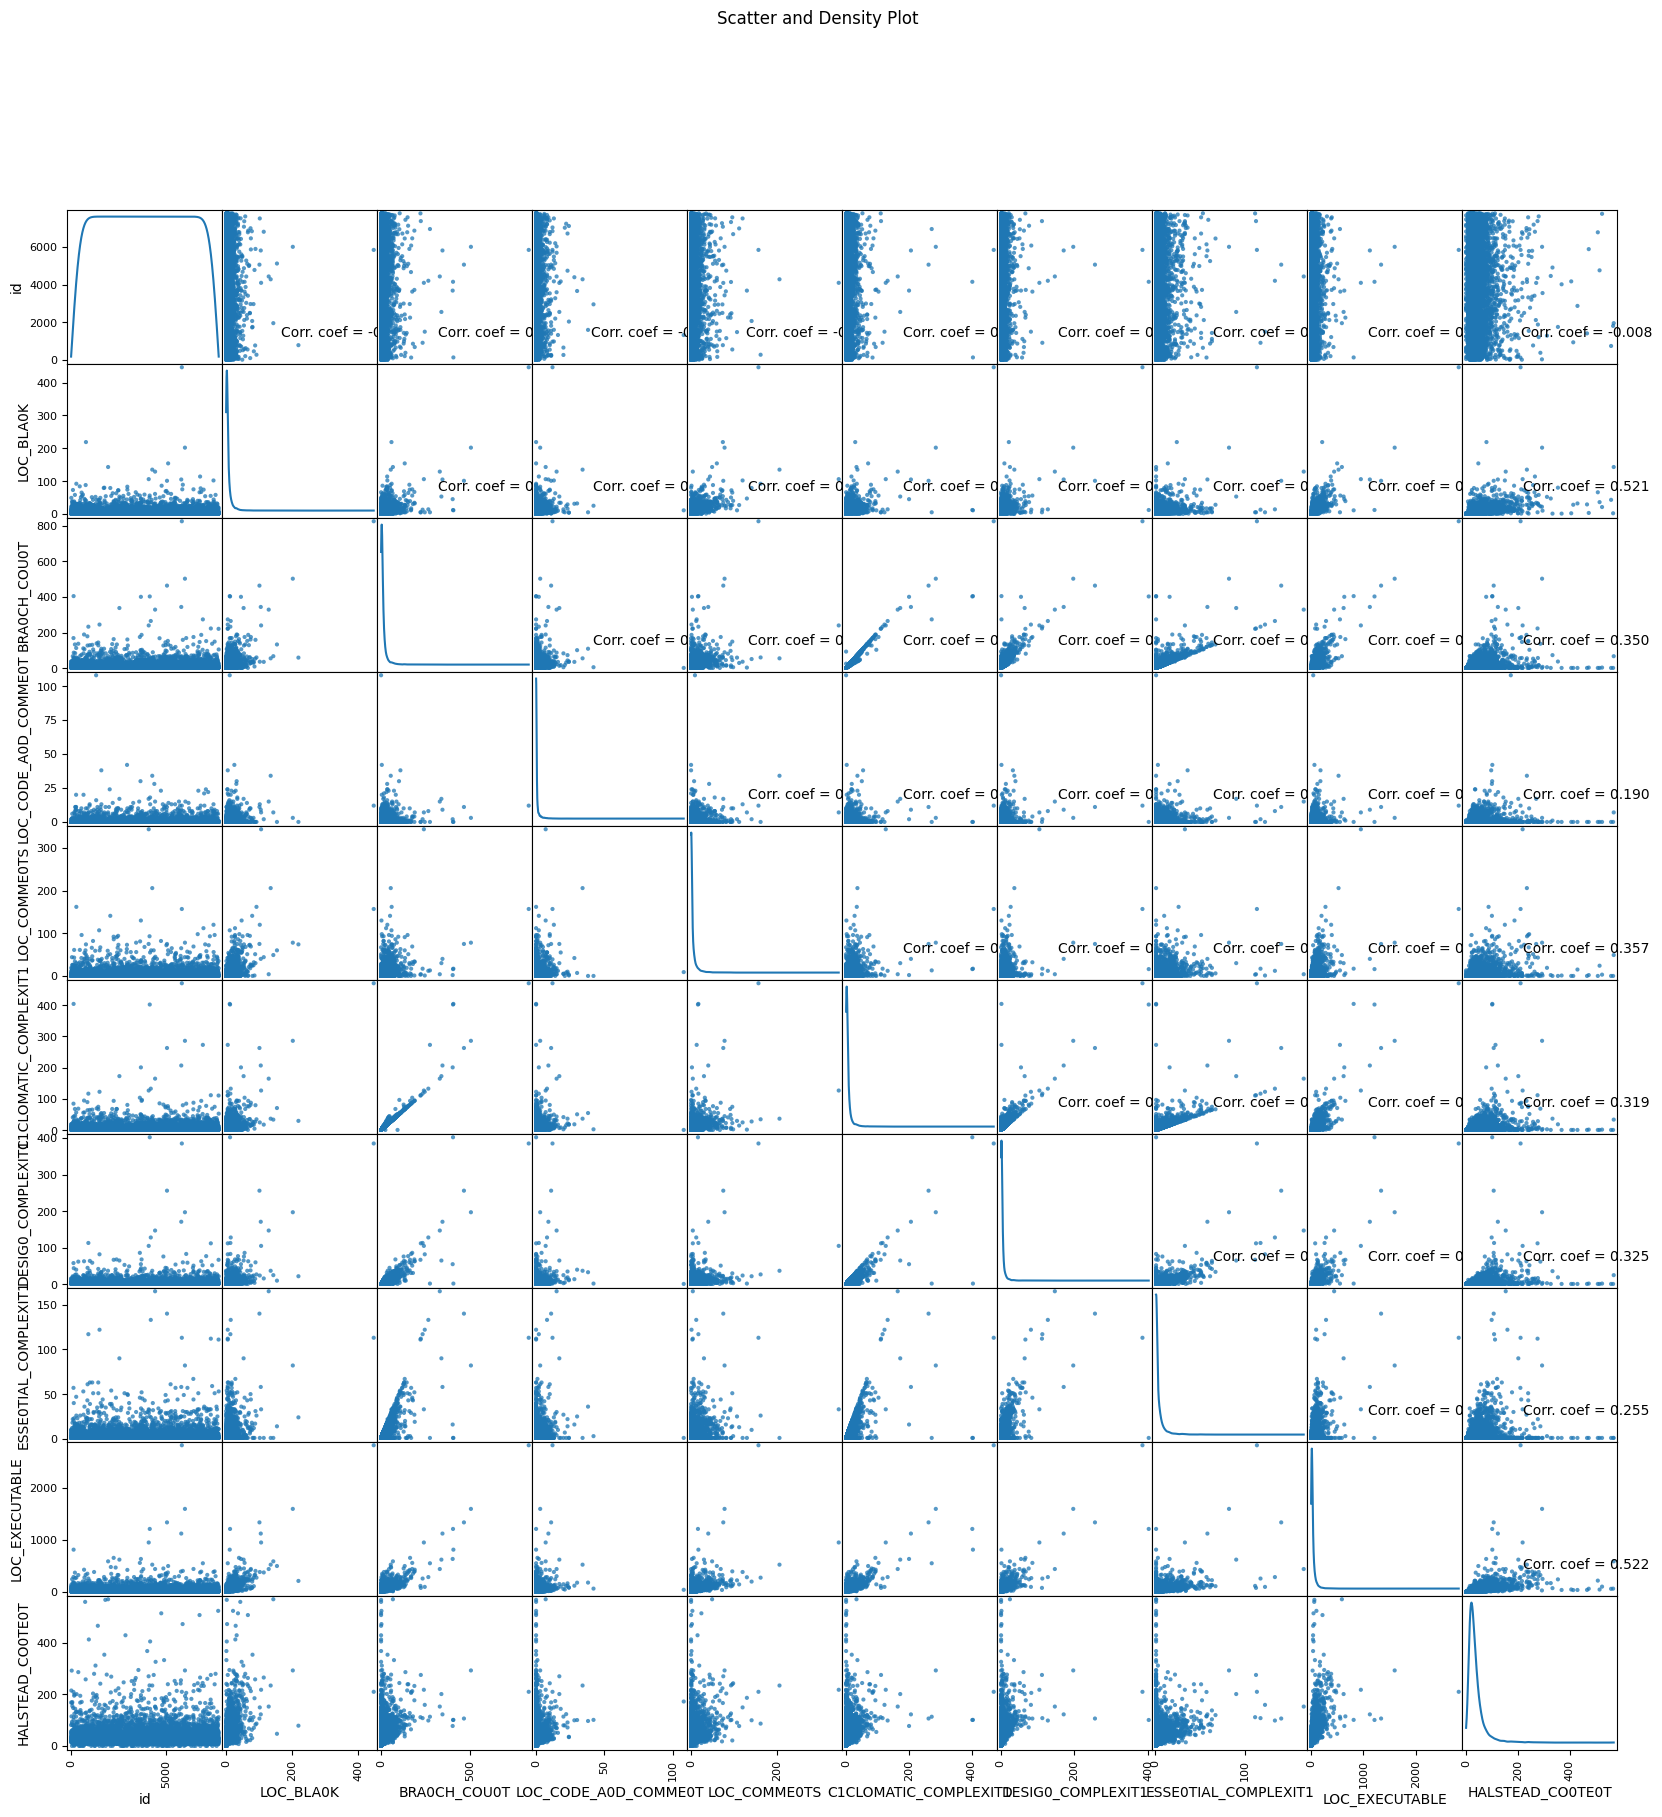

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(data, 20, 10)

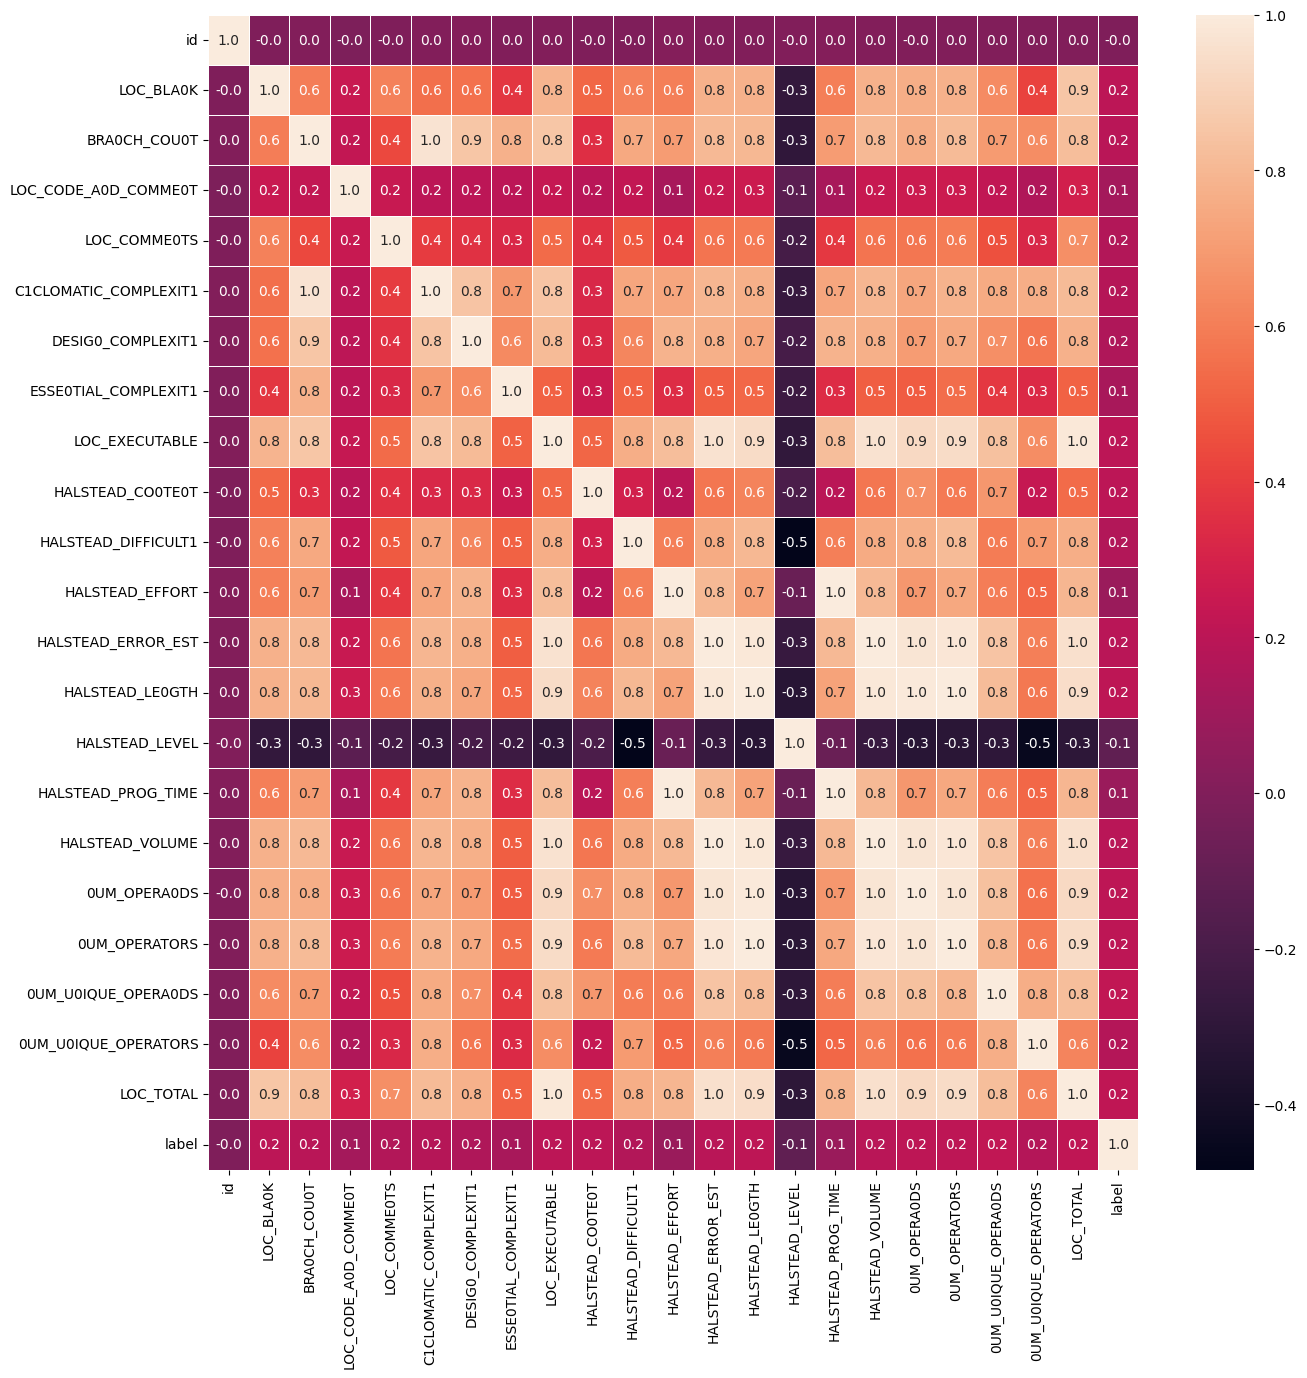

In [ ]:
import seaborn as sns
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.1f')
plt.show()

In [ ]:
data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7782 entries, 0 to 7781
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7782 non-null   int64  
 1   LOC_BLA0K              7782 non-null   int64  
 2   BRA0CH_COU0T           7782 non-null   int64  
 3   LOC_CODE_A0D_COMME0T   7782 non-null   int64  
 4   LOC_COMME0TS           7782 non-null   int64  
 5   C1CLOMATIC_COMPLEXIT1  7782 non-null   int64  
 6   DESIG0_COMPLEXIT1      7782 non-null   int64  
 7   ESSE0TIAL_COMPLEXIT1   7782 non-null   int64  
 8   LOC_EXECUTABLE         7782 non-null   int64  
 9   HALSTEAD_CO0TE0T       7782 non-null   float64
 10  HALSTEAD_DIFFICULT1    7782 non-null   float64
 11  HALSTEAD_EFFORT        7782 non-null   float64
 12  HALSTEAD_ERROR_EST     7782 non-null   float64
 13  HALSTEAD_LE0GTH        7782 non-null   int64  
 14  HALSTEAD_LEVEL         7782 non-null   float64
 15  HALS